### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [102]:
#Data Processing
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns   
import matplotlib.pyplot as plt  
sns.set(color_codes=True) 
%matplotlib inline

#Notebook Output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data = pd.read_csv("Data.csv") #Import Data file
item = pd.read_csv("item.csv") #Import item file
user = pd.read_csv("user.csv") #Import user file

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [104]:
#Applying info, shape, describe to 'Data' dataframe
data.info()
data.shape
data.describe()

##ANSWER: No missing values for 'Data' file based on the data.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


(100000, 4)

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [105]:
#Applying info, shape, describe to 'item' dataframe
item.info()
item.shape
item.describe()

##ANSWER: No missing values for 'item' file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

(1681, 23)

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,...,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,...,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062,1.720405
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,...,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751,0.868287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [108]:
#Applying info, shape, describe to 'user' dataframe
user.info()
user.shape
user.describe()

##ANSWER: No missing values for 'user' file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


(943, 5)

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


#### 4. Find the number of movies per genre using the item data - 5 marks

In [109]:
# use sum on the default axis
# Shows and Aggregates number of movies per genre
item.sum(axis=0)

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [110]:
#hint: use sum on the axis = 1
#Preliminary Steps

#1. Get all genre related columns
column_list = list(item)
column_list[3:22]

#2. Create a variable that adds up the indicator across all genres
item["sum"] = item[column_list[3:22]].sum(axis=1)

#3. Answer: Filter data having multiple genres
item[item["sum"]>1]
item['movie title'][item["sum"]>1]


['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,3
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [112]:
#Create a new dataset where row with Unknown is removed
item2 = item[item["unknown"]!=1]

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [16]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [116]:
#Preliminary Steps
# Join all datasets together
movie = pd.merge(data,item2, how="left" , on='movie id').merge(user,how="left" , on='user id')
movie

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Romance,Sci-Fi,Thriller,War,Western,sum,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential,01-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,4.0,39,F,executive,00000
2,22,377,1,878887116,Heavyweights,01-Jan-1994,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall,01-Jan-1994,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,4.0,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown,01-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,47,M,educator,55113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The",14-Sep-1996,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13,M,student,83702
99996,716,204,5,879795543,Back to the Future,01-Jan-1985,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,36,F,administrator,44265
99997,276,1090,1,874795795,Sliver,01-Jan-1993,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,21,M,student,95064
99998,13,225,2,882399156,101 Dalmatians,27-Nov-1996,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,47,M,educator,29206


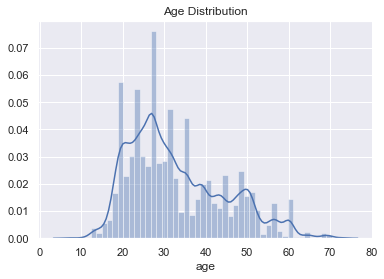

In [117]:
#Univariate Plot for Age -- right skewed
sns.distplot(movie['age']).set_title('Age Distribution');

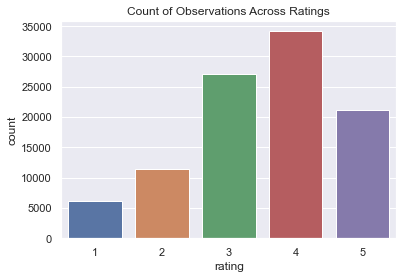

In [118]:
#Univariate Plot for Rating
sns.countplot(movie['rating']).set_title('Count of Observations Across Ratings');

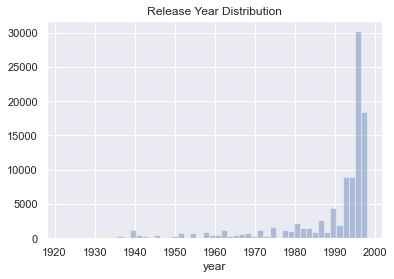

In [119]:
#Univariate Plot for Release Year

#1. Convert release date to year and add to the dataset
movie['year']=pd.to_datetime(movie['release date']).dt.year 
#2. Distribution plot for year -- left skewed
sns.distplot(movie['year'], kde=False).set_title('Release Year Distribution');

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [120]:
#Preliminary Steps

#1. Create a trimmed version of the combined dataset and aggregate each genre by year
movie_trimmed = movie[['year','Action','Adventure','Animation','War','Childrens','Comedy','Crime','Documentary','Drama'
       ,'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].groupby('year').sum()

#2. Make year as another variable instead of index
movie_trimmed.reset_index(level=0, inplace=True)

#3. Show trimmed data
movie_trimmed


,year,Action,Adventure,Animation,War,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1922.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1926.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1931.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0
4,1932.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1994.0,1741.0,878.0,244.0,499.0,605.0,3524.0,784.0,222.0,3787.0,211.0,0.0,375.0,237.0,109.0,2367.0,358.0,1521.0,499.0,319.0
67,1995.0,2328.0,1018.0,550.0,282.0,1118.0,3641.0,1143.0,23.0,4677.0,157.0,57.0,294.0,113.0,140.0,2455.0,1108.0,2456.0,282.0,60.0
68,1996.0,4573.0,2793.0,748.0,1832.0,1038.0,5798.0,1035.0,232.0,8513.0,458.0,82.0,962.0,852.0,613.0,3477.0,1678.0,4496.0,1832.0,87.0
69,1997.0,5674.0,1963.0,164.0,1763.0,775.0,4480.0,2340.0,99.0,6700.0,96.0,370.0,573.0,206.0,2198.0,3359.0,2716.0,6024.0,1763.0,0.0


In [121]:
#4. Create another layout of the 'movie' dataset
movie_trimmed2 = movie_trimmed.melt(['year'])
movie_trimmed3=movie_trimmed2.rename(columns={'variable':'Genre', 'value':'Total Releases'})

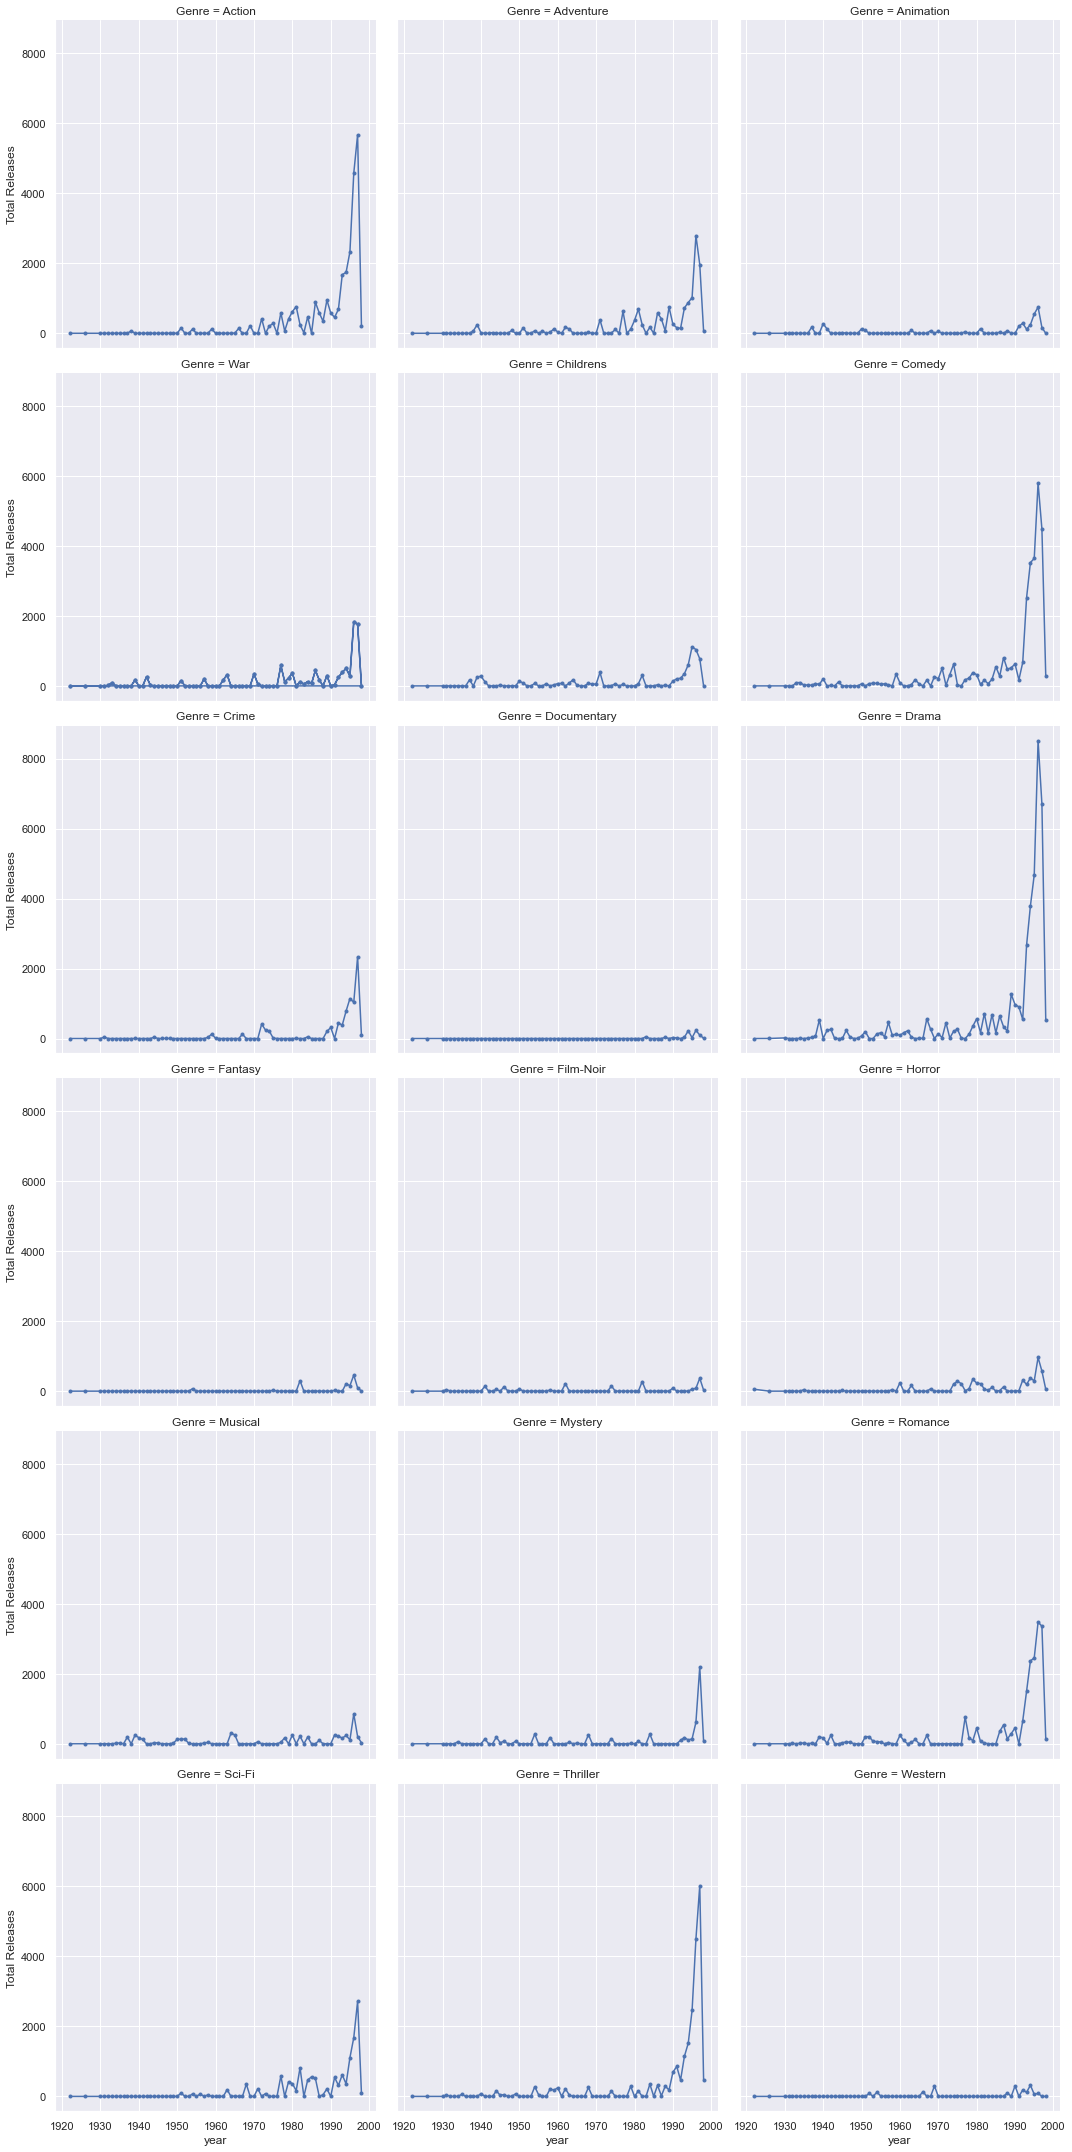

In [122]:
#5. Answers : Use faceted genre chart and line graph in each throughout each year to visualize trend
Genre_Trend = sns.FacetGrid(movie_trimmed3, col="Genre", col_wrap=3, height=5)
Genre_Trend = Genre_Trend.map(plt.plot, "year", "Total Releases", marker=".")

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [124]:
#Preliminary Steps & Answer

#1. Aggregate ratings via count and mean
top100 =movie[['movie title', 'rating']].groupby('movie title').agg(['mean','count'])

#2. Reset the index
top100.reset_index(level=0, inplace=True)

#3. Due to (1) , there have been multilevel index for the dataframe that was produced; removed it
top100.columns = top100.columns.droplevel(0)

#4. Answer : Create a dataframe with top 25 movie titles having >100 ratings and sort their average rating
top25 = top100[top100["count"]>100].sort_values(by='mean',ascending=False).head(25)

top25

,,mean,count
317,"Close Shave, A",4.491071,112
1277,Schindler's List,4.466443,298
1646,"Wrong Trousers, The",4.466102,118
272,Casablanca,4.456790,243
1312,"Shawshank Redemption, The",4.445230,283
1213,Rear Window,4.387560,209
1566,"Usual Suspects, The",4.385768,267
1393,Star Wars,4.358491,583
3,12 Angry Men,4.344000,125
302,Citizen Kane,4.292929,198


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:




In [92]:
#Total count of movies with 'Drama' genre by gender
pd.crosstab(movie.gender, movie.Drama)
#Percentage of gender who watch 'Drama' movies
pd.crosstab(movie.gender, movie.Drama).apply(lambda r: r/r.sum(), axis=1)

Drama,0.0,1.0
gender,,
F,14730,11008
M,45365,28887


Drama,0.0,1.0
gender,,
F,0.572306,0.427694
M,0.610960,0.389040


#### 1. Men DO NOT watch more drama than women. Only 39% of men respondents watched Drama while 43% of female watched it. Moreover, 61% of men don't watch drama while only 57% of women don't.



In [100]:
movie2=movie.rename(columns={'Sci-Fi':'SciFi'})

#Total count of movies with 'Sci-FI' genre by gender
pd.crosstab(movie2.gender, movie2.SciFi)
#Percentage of gender who watch 'Sci-Fi' movies
pd.crosstab(movie2.gender, movie2.SciFi).apply(lambda r: r/r.sum(), axis=1)


SciFi,0.0,1.0
gender,,
F,23109,2629
M,64151,10101


SciFi,0.0,1.0
gender,,
F,0.897855,0.102145
M,0.863963,0.136037


#### 2. Women DO NOT watch more Sci-Fi than men. Only 10% of women watched Sci-Fi while 13% of men watched it. Moreover, 90% of women do not watch Sci-Fi but only 86% for men don't watch it.



In [101]:
#Total count of movies with 'Romance' genre by gender
pd.crosstab(movie.gender, movie.Romance)

pd.crosstab(movie.gender, movie.Romance).apply(lambda r: r/r.sum(), axis=1)

Romance,0.0,1.0
gender,,
F,19880,5858
M,60649,13603


Romance,0.0,1.0
gender,,
F,0.772399,0.227601
M,0.816800,0.183200


#### 3. Men DO NOT watch more Romance than women. Only 18% of men watched Romance while 23% of women watched it. Moreover, 82% of men do not watch Romance but only 77% of women don't watch it.
